# Evaluation insights for the Cogentco network

This notebook is copied and adjusted from the Abilene notebook.

**Inputs:**
* Algorithms: bjointsp, greedy, random
* Network: Cogentco
* Service: fw1chain, fw2chain, fw3chain
* Sources: source0-9

Cogentco is an international network and the largest in the TopologyZoo (most nodes). It has 197 nodes and 245 edges.

![Cogentco](http://topology-zoo.org/maps/Cogentco.jpg)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# include and import place_emu/util/eval.py
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path) 
from place_emu.util import eval


bjointsp_chain_df, bjointsp_aux_chain_df, bjointsp_vnf_df, bjointsp_aux_vnf_df = eval.prepare_eval('Cogentco', 'bjointsp')
greedy_chain_df, greedy_aux_chain_df, greedy_vnf_df, greedy_aux_vnf_df = eval.prepare_eval('Cogentco', 'greedy')
random_chain_df, random_aux_chain_df, random_vnf_df, random_aux_vnf_df = eval.prepare_eval('Cogentco', 'random')

In [2]:
# combined dfs for easier eval
aux_vnf_df = pd.concat([bjointsp_aux_vnf_df, greedy_aux_vnf_df, random_aux_vnf_df])
vnf_df = pd.concat([bjointsp_vnf_df, greedy_vnf_df, random_vnf_df])
chain_df = pd.concat([bjointsp_chain_df, greedy_chain_df, random_chain_df])

There are 12 different pandas dataframes, four for each of the placement algorithms. 

chain_df contains the delays (RTTs) of the whole chain and vnf_df contains the inter-VNF delays. They have separate columns for the simulation and emulation RTTs and additional columns for the difference and the ratio between simulation and emulation RTT.

For easier plotting later, aux_chain_df and aux_vnf_df contain the same data as chain_df and vnf_df, respectiveley, just in a different structure: Here, there is just one column called 'rtt'. Simulation and emulation delays are stored in the same column in different rows. They are distinguished by a new column 'type' that is either 'sim' or 'emu', classifying the type of RTT.

For better intuition, see the tables below.

In [3]:
bjointsp_chain_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,Cogentco,197,245,fw1chain,3,source0,1,bjointsp,2.0,3.05,1.05,1.525000
1,Cogentco,197,245,fw1chain,3,source1,1,bjointsp,2.0,3.00,1.00,1.500000
2,Cogentco,197,245,fw1chain,3,source2,1,bjointsp,0.0,0.95,0.95,inf
3,Cogentco,197,245,fw1chain,3,source3,1,bjointsp,0.0,0.95,0.95,inf
4,Cogentco,197,245,fw1chain,3,source4,1,bjointsp,0.0,0.95,0.95,inf


In [4]:
bjointsp_aux_chain_df.head()

,algorithm,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,rtt,type
0,bjointsp,Cogentco,197,245,fw1chain,3,source0,1,2.0,sim
1,bjointsp,Cogentco,197,245,fw1chain,3,source1,1,2.0,sim
2,bjointsp,Cogentco,197,245,fw1chain,3,source2,1,0.0,sim
3,bjointsp,Cogentco,197,245,fw1chain,3,source3,1,0.0,sim
4,bjointsp,Cogentco,197,245,fw1chain,3,source4,1,0.0,sim


In [5]:
bjointsp_vnf_df.head()

,network,num_nodes,num_edges,service,num_vnfs,sources,num_sources,algorithm,src,dest,sim_rtt,emu_rtt,rtt_diff,rtt_ratio
0,Cogentco,197,245,fw1chain,3,source0,1,bjointsp,vnf_user,vnf_fw1,2.0,2.238,0.238,1.119000
1,Cogentco,197,245,fw1chain,3,source0,1,bjointsp,vnf_fw1,vnf_web,0.0,0.106,0.106,inf
2,Cogentco,197,245,fw1chain,3,source1,1,bjointsp,vnf_user,vnf_fw1,0.0,0.107,0.107,inf
3,Cogentco,197,245,fw1chain,3,source1,1,bjointsp,vnf_fw1,vnf_web,2.0,2.201,0.201,1.100500
4,Cogentco,197,245,fw1chain,3,source2,1,bjointsp,vnf_user,vnf_fw1,0.0,0.127,0.127,inf


## Inter-VNF RTT
Let's do the same for inter-VNF delays/RTTs. Now, we're looking at two VNFs in isolation, i.e., independent of the rest of the chain. Thus, we're not considering chain length.

Text(0.5,1,'Inter-VNF RTT')

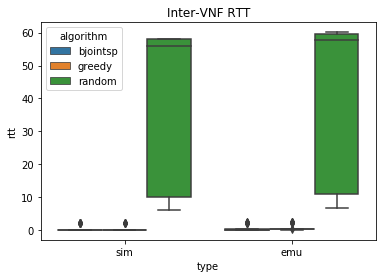

In [6]:
sns.boxplot(x='type', y='rtt', hue='algorithm', data=aux_vnf_df).set_title('Inter-VNF RTT')

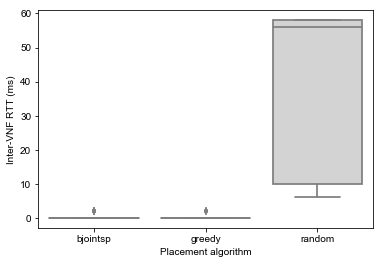

In [7]:
# tuned figure for paper: focus on sim_rtt (emu_rtt similar and checked later)
fig, ax = plt.subplots()
sns.set(font_scale=1.5)
sns.boxplot(x='algorithm', y='sim_rtt', data=vnf_df, color='lightgrey', ax=ax)
#ax.set_title('Sim. inter-VNF RTT')
ax.set_xlabel('Placement algorithm')
ax.set_ylabel('Inter-VNF RTT (ms)')
ax.set_facecolor('white')
fig.savefig('plots/cogentco_sim_vnf_rtt.pdf', bbox_inches='tight')

In the huge Cogentco network, random placement leads to extremely high inter-VNF delays.

### Inter-VNF RTT difference

Absolute difference between emulated and simulated inter-VNF RTT: emu_rtt - sim_rtt

Text(0.5,1,'Inter-VNF RTT difference')

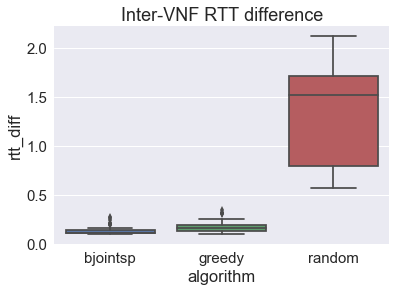

In [8]:
sns.boxplot(x='algorithm', y='rtt_diff', data=vnf_df).set_title('Inter-VNF RTT difference')

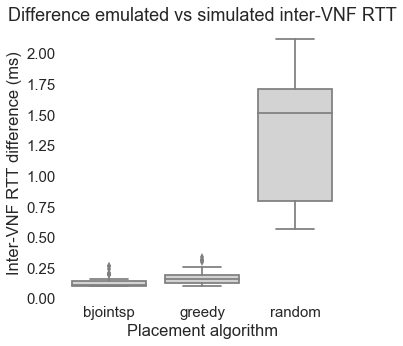

In [9]:
# tuned figure for paper
fig, ax = plt.subplots(figsize=(5,5))
sns.set(font_scale=1.5)
sns.boxplot(x='algorithm', y='rtt_diff', data=vnf_df, ax=ax, color='lightgrey')
ax.set_title('Difference emulated vs simulated inter-VNF RTT')
ax.set_xlabel('Placement algorithm')
ax.set_ylabel('Inter-VNF RTT difference (ms)')
ax.set_facecolor('white')
fig.savefig('plots/cogentco_vnf_rtt_diff.pdf', bbox_inches='tight')

The absolute difference between simulated and emulated inter-VNF RTTs is rather small. 

For bjointsp and greedy, it is generally smaller than for random placement. Also the spread is smaller. This is probably due to the longer paths in random placement, which allow for more deviation between simulation and emulation.

Text(0.5,1,'Random placement')

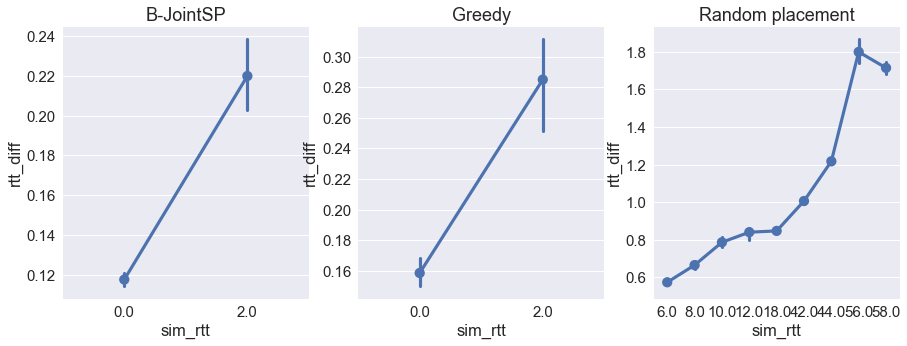

In [10]:
# plot RTT difference as a variable of the node distance = link delay = sim delay/RTT
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.pointplot(x='sim_rtt', y='rtt_diff', data=bjointsp_vnf_df, ax=ax1).set_title('B-JointSP')
sns.pointplot(x='sim_rtt', y='rtt_diff', data=greedy_vnf_df, ax=ax2).set_title('Greedy')
sns.pointplot(x='sim_rtt', y='rtt_diff', data=random_vnf_df, ax=ax3).set_title('Random placement')

Apparently, Congento is so dense that there are always available PoPs nearby with 0 or 1 link delay, i.e., RTT 0 or 2. This is correct behavior, considering that we always round to integer delays.

Regarding random placement, I still don't know why the rtt_diff goes down at the end. Maybe just a connection with fewer intermediate PoPs and thus less emulation overhead.

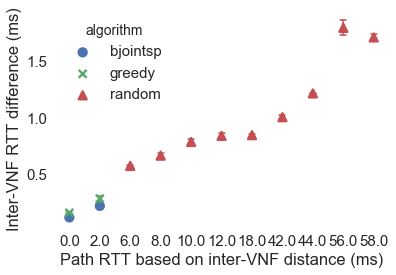

In [11]:
# tuned figure for paper
fig, ax = plt.subplots()
sns.set(font_scale=1.5)
#black_palette = sns.color_palette(['black', 'black', 'black'])
sns.pointplot(x='sim_rtt', y='rtt_diff', data=vnf_df, ax=ax,
              hue='algorithm', join=False, markers=['o', 'x', '^'], errwidth=1.5, capsize=0.2)
#ax.set_title('Difference emulated vs simulated inter-VNF RTT')
ax.set_xlabel('Path RTT based on inter-VNF distance (ms)')
ax.set_ylabel('Inter-VNF RTT difference (ms)')
ax.set_facecolor('white')
fig.savefig('plots/cogentco_vnf_rtt_diff_sim_rtt.pdf', bbox_inches='tight')

The difference of emulated and simulated inter-VNF RTTs increases with increasing simulated inter-VNF RTT. The simulated inter-VNF RTT directly reflects the link delay and thus distance between two connected VNFs.

Hence, for two very close VNFs, the simulated and emulated delays are almost identical, but for VNFs that are placed farther away (higher sim_rtt), the emulated delay can be significantly larger than the simulated delay.


### Inter-VNF RTT ratio

Relative ratio of emulated vs. simulated inter-VNF RTT: emu_rtt / sim_rtt

Set to infinity if sim_rtt = 0.

In [12]:
# set infinite ratios to NaN, so they are ignored when plotting
vnf_df = vnf_df.replace(np.inf, np.nan)
for alg in ['bjointsp', 'greedy', 'random']:
    num_invalid = vnf_df.loc[(vnf_df['algorithm'] == alg) & (vnf_df['rtt_ratio'].isnull())].shape[0]
    num_total = vnf_df.loc[vnf_df['algorithm'] == alg].shape[0]
    print('Entries with invalid ratio for {}: {} of {}'.format(alg, num_invalid, num_total))

Entries with invalid ratio for bjointsp: 81 of 90
Entries with invalid ratio for greedy: 84 of 90
Entries with invalid ratio for random: 0 of 90


Text(0.5,1,'Inter-VNF RTT ratio')

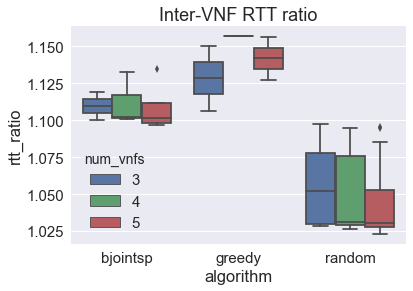

In [13]:
sns.boxplot(x='algorithm', y='rtt_ratio', hue='num_vnfs', data=vnf_df).set_title('Inter-VNF RTT ratio')

Basically meaningless plot for bjointsp and greedy because so many ratios are invalid (due to 0 simulated delay) and thus not shown in the plot.

## Chain RTT

Let's continue the evaluation by analyzing the RTT of the whole chain, comparing the different placement algorithms.

Text(0.5,1,'Emulation chain RTT')

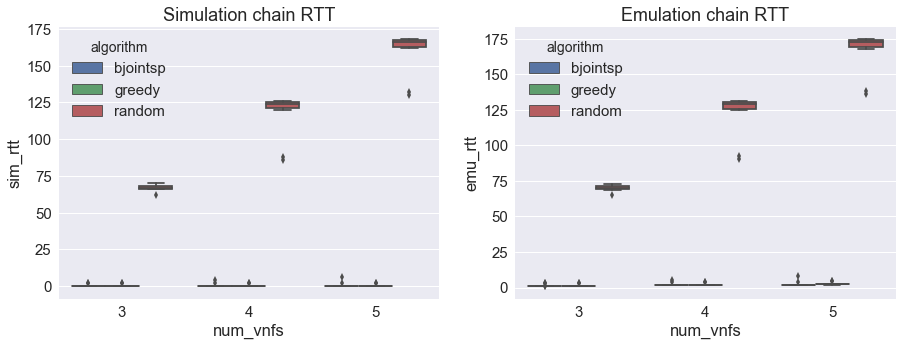

In [14]:
# comparison of bjointsp and random placement
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='sim_rtt', hue='algorithm', data=chain_df, ax=ax1).set_title('Simulation chain RTT')
sns.boxplot(x='num_vnfs', y='emu_rtt', hue='algorithm', data=chain_df, ax=ax2).set_title('Emulation chain RTT')

This isn't really useful. Just shows that random placement has much higher RTTs than the other algorithms. Duh!

### Chain RTT difference

Absolute difference between emulated and simulated chain RTT: emu_rtt - sim_rtt

Text(0.5,1,'Random chain RTT difference')

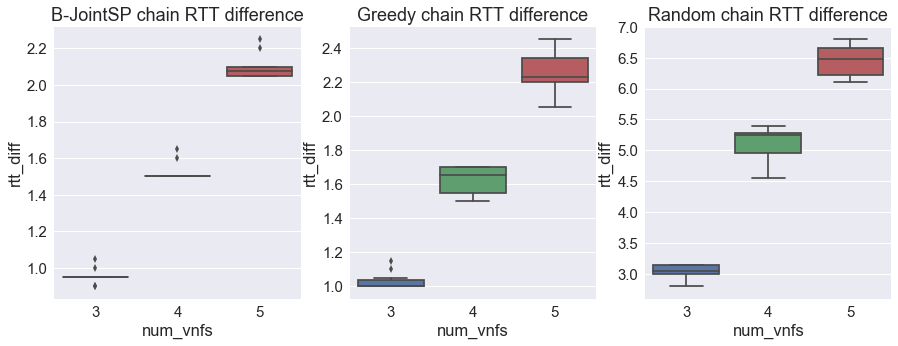

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='num_vnfs', y='rtt_diff', data=bjointsp_chain_df, ax=ax1).set_title('B-JointSP chain RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=greedy_chain_df, ax=ax2).set_title('Greedy chain RTT difference')
sns.boxplot(x='num_vnfs', y='rtt_diff', data=random_chain_df, ax=ax3).set_title('Random chain RTT difference')

Looking at the difference in RTT, the emulation delay is clearly higher than the simulation delay. And the difference between the two increases with increasing chain length. There is surprisingly little deviation/spread in rtt_diff for each chain length, meaning that any difference can be well explained through chain length.

For random placement, the absolute difference between simulated and emulated chain RTTs is a little higher (longer paths).


### Chain RTT ratio

Relative ratio of emulated vs. simulated chain RTT: emu_rtt / sim_rtt

In [16]:
# set infinite ratios to NaN, so they are ignored when plotting
chain_df = chain_df.replace(np.inf, np.nan)
for alg in ['bjointsp', 'greedy', 'random']:
    num_invalid = chain_df.loc[(chain_df['algorithm'] == alg) & (chain_df['rtt_ratio'].isnull())].shape[0]
    num_total = chain_df.loc[chain_df['algorithm'] == alg].shape[0]
    print('Entries with invalid ratio for {}: {} of {}'.format(alg, num_invalid, num_total))

Entries with invalid ratio for bjointsp: 24 of 30
Entries with invalid ratio for greedy: 24 of 30
Entries with invalid ratio for random: 0 of 30


Text(0.5,1,'Chain RTT ratio')

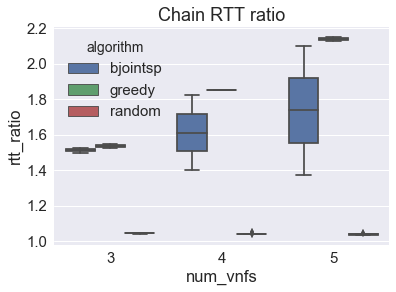

In [17]:
sns.boxplot(x='num_vnfs', y='rtt_ratio', hue='algorithm', data=chain_df).set_title('Chain RTT ratio')

The long paths of random placement lead to a relative ratio of emulation vs simulation delay very close to 1.

For the other two algorithms, the plot is basically meaningless as 24 out of 30 ratios are invalid because the simulated delay is 0.

# Conclusion

* Because there are so many PoPs close together and delays are rounded to full integers, greedy and bjointsp almost always find placements with 0 simulated delay.
* The delay for random placement is extraordinary high.
* The basic findings of the other networks hold here too:
  * Longer distance between interconnected VNFs leads to higher deviation of emulated RTT vs simulated RTT
  * Longer chains lead also to higher deviation
* The plots for the relative ratio are useless as most ratios are invalid since sim_rtt=0.